In [1]:
import xml.etree.ElementTree as ET

def get_total_waiting_time(tripinfo_path):
    tree = ET.parse(tripinfo_path)
    root = tree.getroot()

    total_wait = 0.0
    for trip in root.findall('tripinfo'):
        total_wait += float(trip.get('waitingTime'))

    return total_wait

def get_total_waiting_count(tripinfo_path):
    tree = ET.parse(tripinfo_path)
    root = tree.getroot()

    total_wait_count = 0
    for trip in root.findall('tripinfo'):
        wait_time = float(trip.get('waitingCount'))
        if wait_time > 0:
            total_wait_count += int(trip.get('waitingCount'))

    return total_wait_count

def get_total_travel_time(tripinfo_path):
    tree = ET.parse(tripinfo_path)
    root = tree.getroot()

    total_travel = 0.0
    for trip in root.findall('tripinfo'):
        total_travel += float(trip.get('duration'))

    return total_travel

def get_avg_time_loss(tripinfo_path):
    tree = ET.parse(tripinfo_path)
    root = tree.getroot()

    total_timeloss = 0.0
    trip_count = 0
    for trip in root.findall('tripinfo'):
        total_timeloss += float(trip.get('timeLoss'))
        trip_count += 1

    avg_timeloss = total_timeloss / trip_count if trip_count > 0 else 0.0
    return avg_timeloss

env_name = input("Nhập tên môi trường: ")

FileNotFoundError: [Errno 2] No such file or directory: '/home/hoanganh04/Projects/CoLight/./logs4nodes/adjust_cycle_duration/0.monitor.csv'

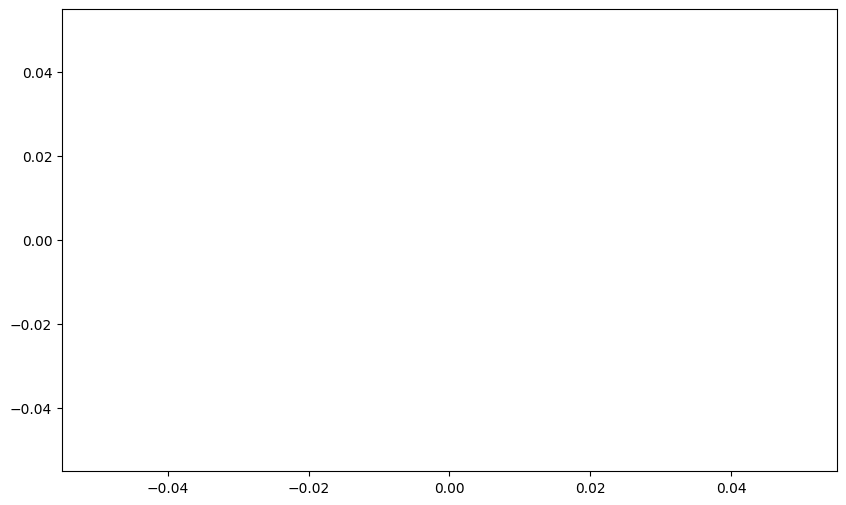

In [ ]:
from pathlib import Path
from TransSimHub.tshub.utils.plot_reward_curves import plot_multi_reward_curves
from TransSimHub.tshub.utils.get_abs_path import get_abs_path

try:
    current_file = __file__
except NameError:
    current_file = str(Path.cwd() / 'compare_result.ipynb')

path_convert = get_abs_path(current_file)

dirs_and_labels = {
    'Next Or Not': [
        path_convert(f'./logs/{env_name}/next_or_not/{i}.monitor.csv')
        for i in range(5)
    ],
    # 'Adjust Cycle Duration': [
    #     path_convert(f'./logs{env_name}/adjust_cycle_duration/{i}.monitor.csv')
    #     for i in range(5)
    # ]
}

ouput_file = f'./result.png'

plot_multi_reward_curves(dirs_and_labels, ouput_file)


In [2]:
# Trước khi dùng RL

path = f"/home/hoanganh04/Projects/CoLight/Scenario/{env_name}/output/e2.tripinfo.xml"

total = get_total_waiting_time(path)
print("Total waiting time =", total)

count = get_total_waiting_count(path)
print("Total waiting count =", count)

total_travel = get_total_travel_time(path)
print("Total travel time =", total_travel)

avg_time_loss = get_avg_time_loss(path)
print("Average time loss =", avg_time_loss)

Total waiting time = 28420.0
Total waiting count = 912
Total travel time = 75273.0
Average time loss = 37.55422680412372


In [4]:
# Sau khi dùng RL - adjust_cycle_duration

path = f"/home/hoanganh04/Projects/CoLight/deploy.tripinfo.xml"

total = get_total_waiting_time(path)
print("Total waiting time =", total)

count = get_total_waiting_count(path)
print("Total waiting count =", count)

total_travel = get_total_travel_time(path)
print("Total travel time =", total_travel)

avg_time_loss = get_avg_time_loss(path)
print("Average time loss =", avg_time_loss)

Total waiting time = 47280.0
Total waiting count = 1889
Total travel time = 100825.0
Average time loss = 50.005475841873995


In [4]:
# Sau khi dùng RL - choose_next_phase

path = f"/home/hoanganh04/Projects/LLM-Assisted-Light/TSCRL/{env_name}_choose_next_phase.tripinfo_1.xml"

total = get_total_waiting_time(path)
print("Total waiting time =", total)

count = get_total_waiting_count(path)
print("Total waiting count =", count)

total_travel = get_total_travel_time(path)
print("Total travel time =", total_travel)

avg_time_loss = get_avg_time_loss(path)
print("Average time loss =", avg_time_loss)

FileNotFoundError: [Errno 2] No such file or directory: '/home/hoanganh04/Projects/LLM-Assisted-Light/TSCRL/test_choose_next_phase.tripinfo_1.xml'

In [ ]:
# LLM

path = f"/home/hoanganh04/Projects/LLM-Assisted-Light/{env_name}_LLM.tripinfo.xml"

total = get_total_waiting_time(path)
print("Total waiting time =", total)

count = get_total_waiting_count(path)
print("Total waiting count =", count)

total_travel = get_total_travel_time(path)
print("Total travel time =", total_travel)

avg_time_loss = get_avg_time_loss(path)
print("Average time loss =", avg_time_loss)

Total waiting time = 41657.0
Total waiting count = 2036
Total travel time = 134769.0
Average time loss = 36.270025588536384
